# Creating a discretized grid to analyse functions

## Create a discretized axis

The ``DiscretizedAxis`` object allows to discretize a given range e.g. an energy or DOS range. At the moment, uniformly and normally distributed discretizations are implemented. The method can be chosen via ``discretization_method``. Either a string specifying the implemented methods or a custom function are allowed.

The ``DiscretizedAxis`` expects the ``axis_type`` argument, this can be either "x" or "y". The other attributes can be set afterwards. The ``axis_type`` specifies the shape of the internal ``numpy array`` that stores the values of the axis.

Create Two axis, both of ``axis_type`` ``x`` but with different ranges and discretization types. The ``normal`` discretization expects a ``mean`` and ``standard deviation``.
In case of the uniform distribution, no further keywords are needed and the step size is specified via ``min_step``.

Further arguments of the class are:

* ``min``, ``max``: Specify the minimum and maximum value of the axis
* ``max_num_steps``: Specifies the maximum step size for the gaussian distributed discretization which is ``max_num_steps`` multiplied with ``min_step``.

In [1]:
from aim2dat.fct import DiscretizedAxis

axis = DiscretizedAxis(axis_type="x", max=0.49, min=0, min_step=0.01)
axis.discretization_method = "gaussian"
axis.discretize_axis(mu=1, sigma=2)

axis2 = DiscretizedAxis(axis_type="x", max=1, min=0, min_step=0.02)
axis2.discretization_method = "uniform"
axis2.discretize_axis()

DiscretizedAxis
	axis_type: x
	max: 1
	min: 0
	min_step: 0.02
	max_num_steps: 5
	precision: 6
	discretization_method: _uniform_discretization


We can now check that the axis is uniformly distributed.

In [2]:
axis.axis

array([[0.  , 0.01, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
        0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
        0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
        0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
        0.46, 0.47, 0.48, 0.49]])

Normally distributed.

In [3]:
axis2.axis

array([[0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]])

## Merge two objects with the same ``axis_type``


The addition of two ``DiscretizedAxis`` objects leads to a merge of the two axis ranges. The axis of the first summand is kept. In case the second summand covers a range that is not covered by the first one, the part will be merged. Before the ranges are merged, the last point of the first summand and the first point of the merged range are aligned.

In [4]:
axis3 = axis + axis2

The merge is performed at 0.49. The values of the `axis2` are shifted as mentioned before.

In [5]:
axis3.axis

array([[0.  , 0.01, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
        0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
        0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
        0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
        0.46, 0.47, 0.48, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63,
        0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85,
        0.87, 0.89, 0.91, 0.93, 0.95, 0.97, 0.99]])

## Axis can be transposed

Transposing an axis converts the `axis_type` from `x` to `y` and vice versa.

The following cells show the functionality. The `axis_type` is not changed by the transpose method but the method returns a copy with the converted `axis_type`, as known for `numpy`.

The `T` attribute is also supported and does the same as `transpose`. Moreover, the methods return the `instance` wherefore chained method calls are possible.

In [6]:
axis.axis_type

'x'

In [7]:
axis_t = axis.transpose()

Initial type is not changed.

In [8]:
axis.axis_type

'x'

In [9]:
axis_t.axis_type

'y'

The corresponding array shape. "y" corresponds to a column vector.

In [10]:
axis_t.shape

(-1, 1)

Chained calls.

In [11]:
axis.T.axis_type

'y'

In [12]:
axis.T.T.axis_type

'x'

## Combine two objects with different `axis_type` to a grid

It was shown above that the addition of two axis objects leads to a merge of the corresponding ranges. In case the two objects do not have the same `axis_type`, the addition will create a grid. The `axis_type` "x" discretizes the "x" range and the `axis_type` "y" the "y" range.

In [13]:
axis4 = axis + axis_t
axis4

The returned object contains only the parameters for the grid. The grid needs to be created via the following method call. It will generate the internal representation of the grid which is a list of lists. The first argument of each sublist contains the x-value and the second argument contains a list with the discretized y-values.

In [14]:
axis4.create_grid()

(1, 48)
(48, 48)


The grid can be visualized via the following method.

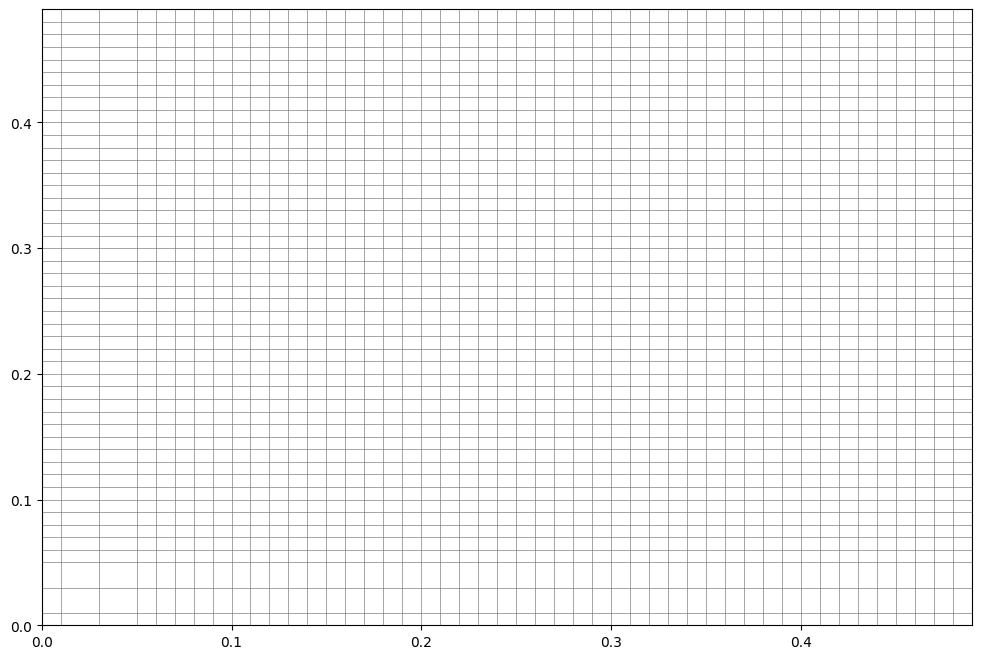

In [15]:
axis4.plot_grid()

## Weighted grid

The multiplication of two axis objects expect two objects with different `axis_type` attributes. It also cerates a grid. In contrast to the addition, the multiplication weights the y-values by the x-values. The weights are currently related to the width of a bin in x-direction.

The following cell uses the merged `axis3` from above and the transposed uniformly distributed `axis2`. It can be seen, that the discretization in z-direction changes with the x-width.

In [16]:
axis5 = axis3 * axis2.T
axis5.create_grid()

(1, 73)
(73, 51)


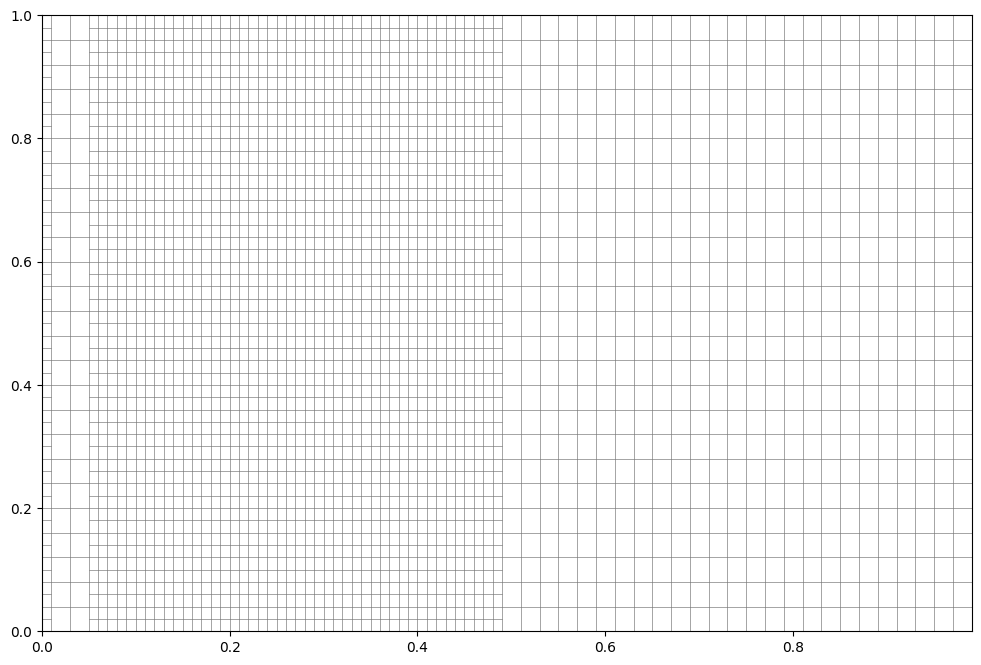

In [17]:
axis5.plot_grid()